# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [77]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Challenge 
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [78]:
# your code here
# your code here
fitbit = pd.read_csv('../data/Fitbit2.csv')

fitbit

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,2016-05-03,3796,18588,14.13,16,599.000,275,49,79,236,...,8.779972,Tuesday,1.0,1,6.283333,91.951220,5.233333,90.229885,May,5
363,2016-05-04,3525,16382,12.39,16,684.000,333,10,55,2075,...,7.698787,Wednesday,2.0,1,6.766667,95.081967,6.283333,91.951220,May,5
364,2016-05-05,3649,21913,16.40,19,701.000,287,29,90,2249,...,10.190484,Thursday,3.0,1,4.666667,88.888889,6.766667,95.081967,May,5
365,2016-05-06,3539,19023,14.79,15,575.000,298,8,85,2112,...,9.190077,Friday,4.0,1,6.166667,89.805825,4.666667,88.888889,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays?
**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

In [79]:
# AVERAGE STEPS BY MONTH_ENCODED
# your code here

def pt(df,columna,columna2,funtion):
    return pd.pivot_table(df,index=columna,values=columna2,aggfunc=funtion)
tab=pt(fitbit,'Months_encoded','Steps','mean')

 
tab

,Steps
Months_encoded,
1,9892.064516
2,8922.866667
3,10312.935484
4,13079.033333
5,10620.096774
6,12536.166667
7,9193.322581
8,11584.774194
9,9191.333333


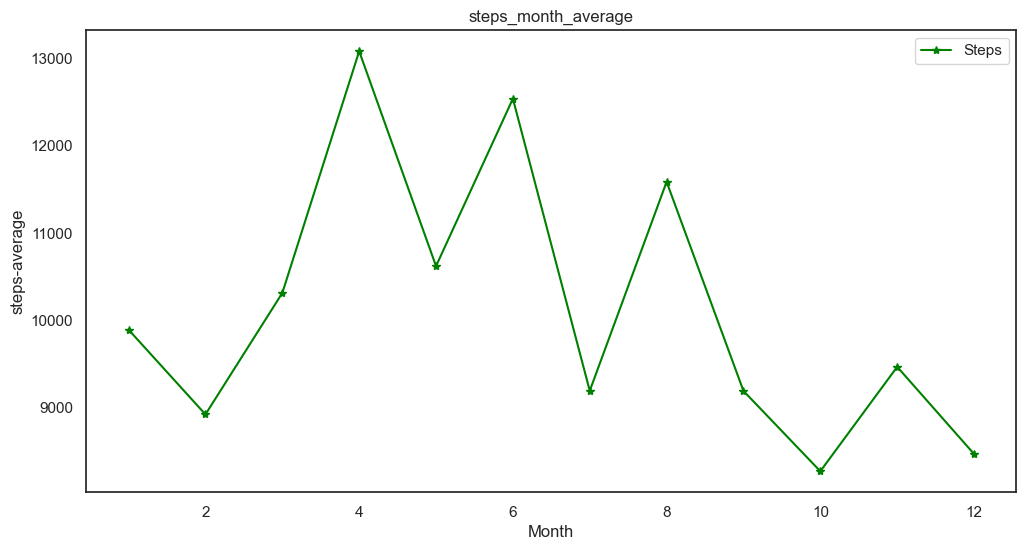

In [80]:
tab
fig, ax = plt.subplots()
ax.plot(tab.index, tab.values, marker='*', linestyle='-', color='green')
ax.set_title('steps_month_average')
ax.set_xlabel('Month')
ax.set_ylabel('steps-average')
ax.legend(['Steps'])

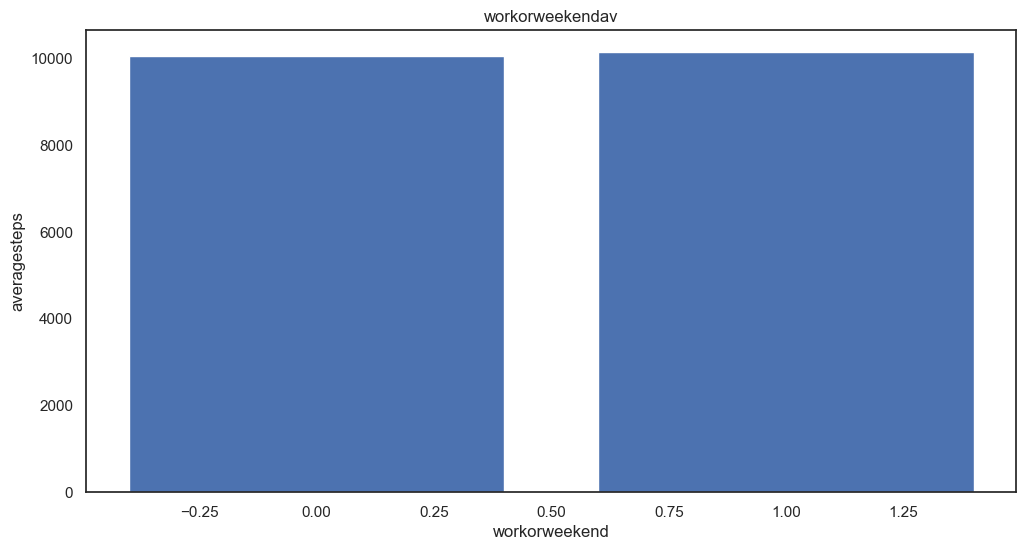

In [81]:
# AVERAGE STEPS BY WORK_OR_WEEKEND
# your code here


stw=fitbit.groupby('Work_or_Weekend').Steps.mean()
plt.bar(stw.index, stw)
plt.xlabel('workorweekend')
plt.ylabel('averagesteps')
plt.title('workorweekendav')
plt.show()

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

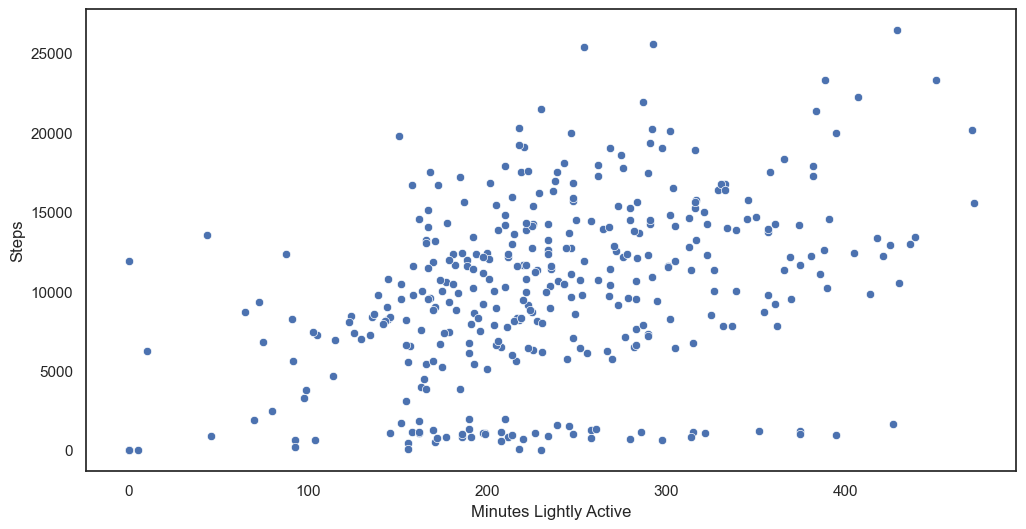

In [82]:
# your code here
sns.scatterplot(data=fitbit, 
                x='Minutes Lightly Active', 
                y='Steps')
plt.show()

## Challenge 

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [83]:
titanic = pd.read_csv('../data/titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [84]:
# your code here
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Gender       1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [85]:
# NUMERICAL VARIABLES
# your code here
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,0.383838,2.294882,29.879186,0.498854,0.385027,33.281086
std,378.020061,0.486592,0.837836,13.448335,1.041658,0.865560,51.741500
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.500000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,37.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [86]:
# CATEGORICAL VARIABLES
# your code here
titanic.describe(include='object')

,Name,Gender,Ticket,Cabin,Embarked
count,1309,1309,1309,1309,1309
unique,1307,2,929,187,3
top,"Connolly, Miss. Kate",male,CA. 2343,U0,S
freq,2,843,11,1014,916


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [87]:
# your code here
sns.set_style("ticks")
plt.rcParams['figure.figsize']=(12,6)

#### Use the right visulalization to show the distribution of column `Age`.

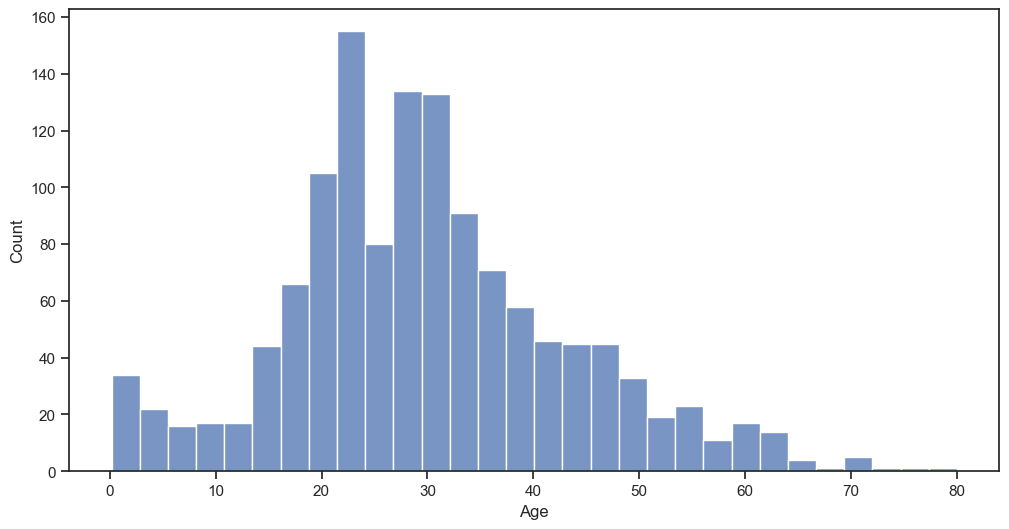

In [88]:
# your code here
sns.histplot(titanic['Age']);

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

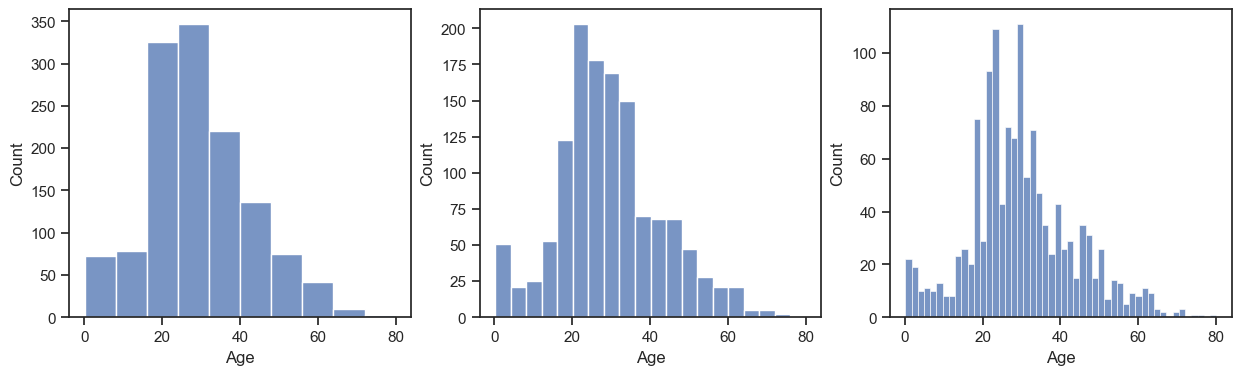

In [89]:
# your code here
# your code here
bins = [10,20,50]

fig, ax = plt.subplots(1, 3);
fig.set_size_inches(15, 4)

for i,b in enumerate(bins):
    plt.sca(ax[i])
    sns.histplot(titanic['Age'],bins=b);

#### How does the bin size affect your plot?

#### Use seaborn to show the distribution of column `Age`.

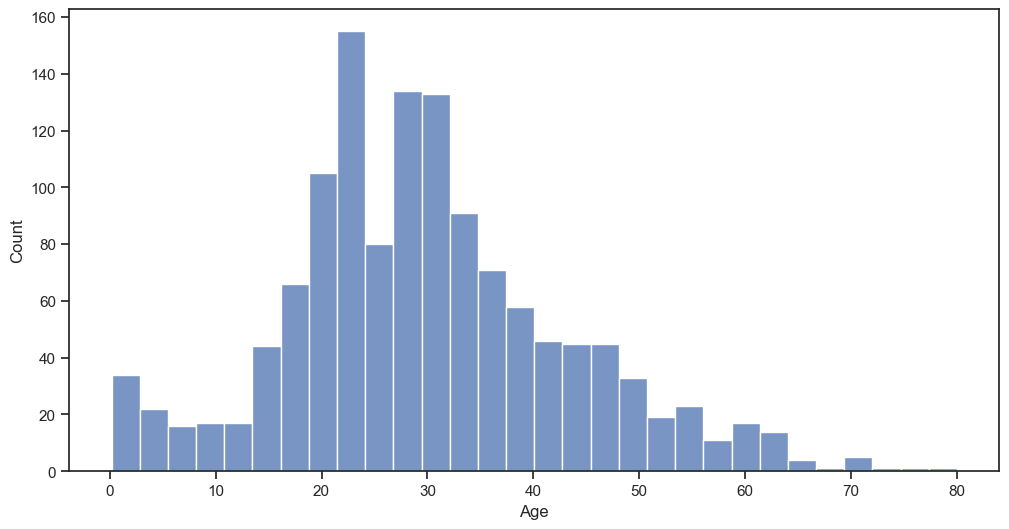

In [90]:
# your code here
sns.histplot(titanic['Age']);


#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

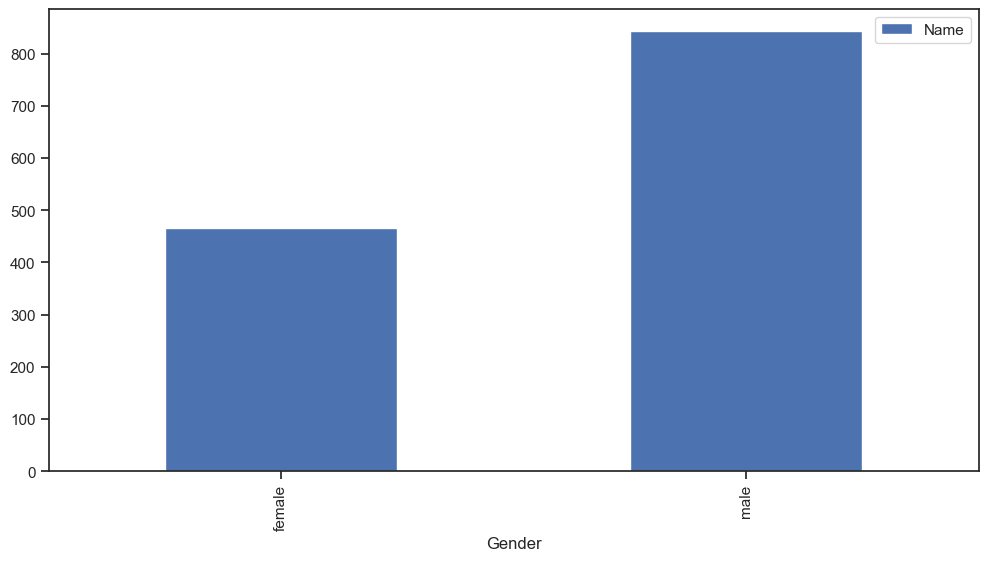

In [91]:
# Method 1 - matplotlib
# your code here
titanic.groupby('Gender').agg({'Name':'count'}).plot(kind='bar');

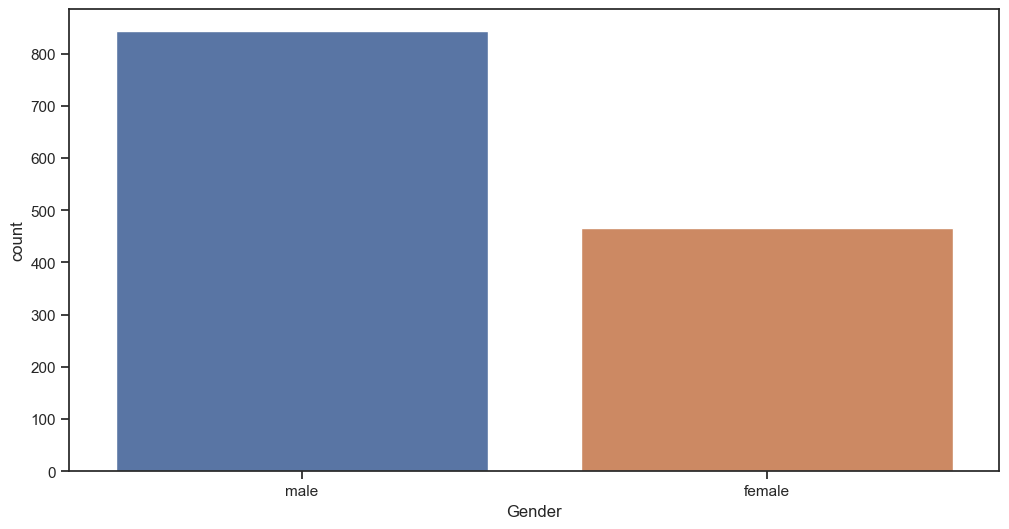

In [92]:
# Method 2 - seaborn
# your code here
sns.countplot(x =titanic.Gender);

#### Use the right plot to visualize the column `Pclass`.

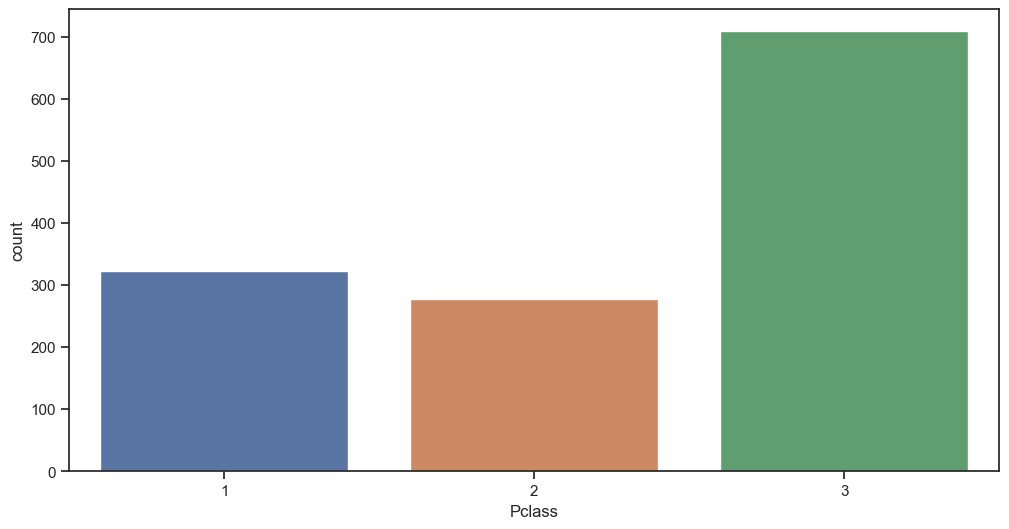

In [93]:
# your code here
sns.countplot(x =titanic.Pclass);



#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

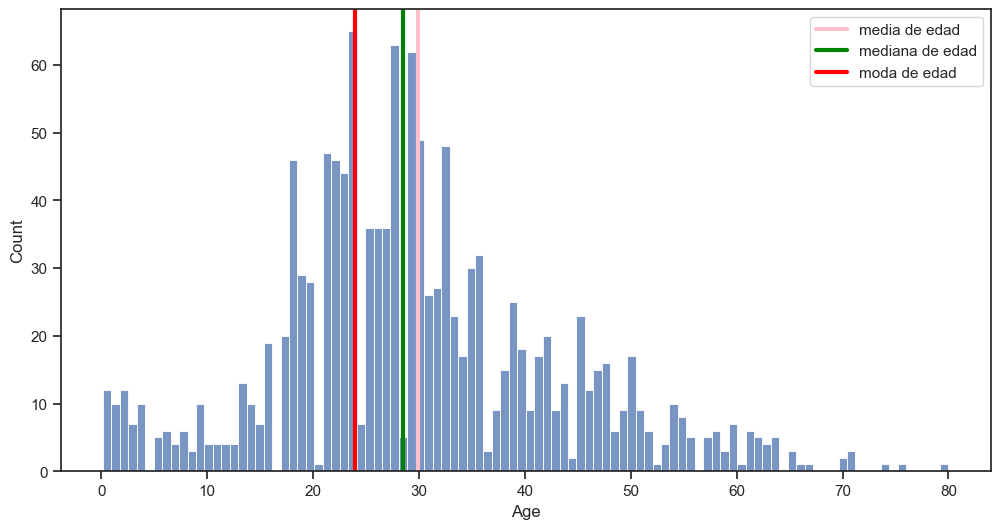

In [94]:
# your code here
sns.histplot(titanic.Age, bins = 100);

plt.axvline(titanic.Age.mean(),
            c='pink',
            linewidth=3.,
            linestyle='-',
            label='media de edad')

plt.axvline(titanic.Age.median(),
            c='green',
            linewidth=3.,
            linestyle='-',
            label='mediana de edad')
plt.axvline(titanic.Age.mode()[0],
            c='red',
            linewidth=3.,
            linestyle='-',
            label='moda de edad')

plt.legend();


#### What does the last plot tell you about the feature `Age`?

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

<Axes: >

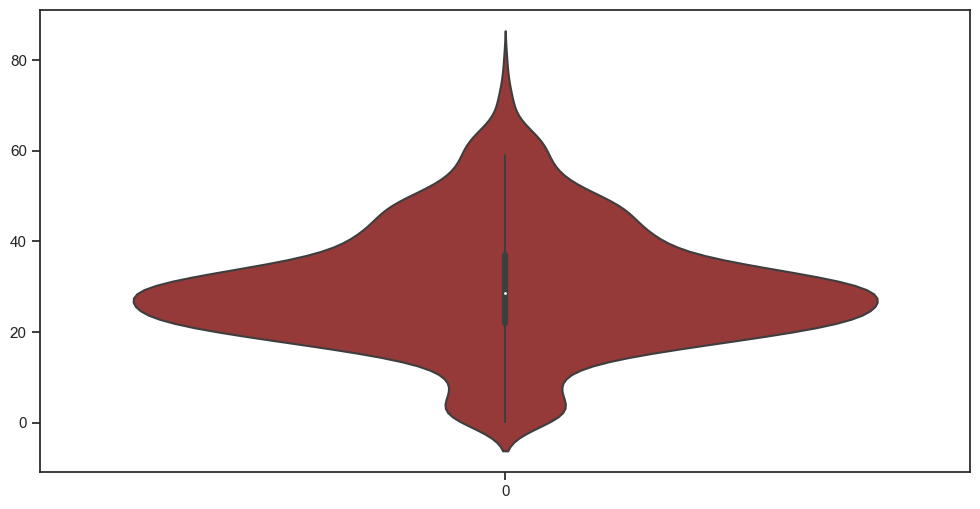

In [95]:
# your code here
flare=sns.color_palette("flare")
sns.violinplot(data=titanic.Age, color='brown')


#### What additional information does the last plot provide about feature `Age`?

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

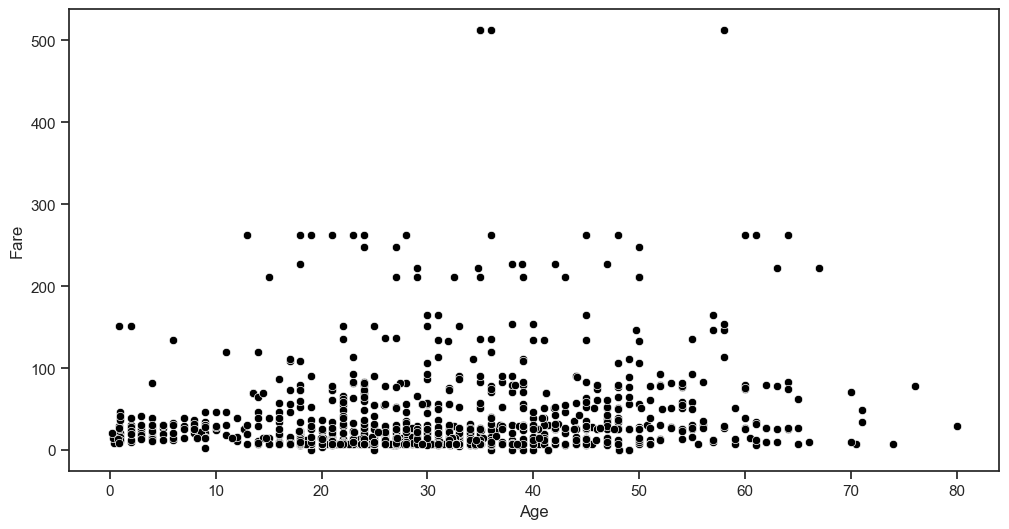

In [96]:
# Method 1 - matplotlib
# your code here
sns.scatterplot(data=titanic, 
                x='Age', 
                y='Fare',
                color='black');

#### Plot the correlation matrix using seaborn.

In [97]:
# your code here
df2 = titanic.select_dtypes(include='number')
corrmatrix = df2.corr()
corrmatrix

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.025325,-0.055224,0.008942,0.031128
Survived,-0.005007,1.000000,-0.338481,-0.065376,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.425965,0.060832,0.018322,-0.558683
Age,0.025325,-0.065376,-0.425965,1.000000,-0.260706,-0.145488,0.171355
SibSp,-0.055224,-0.035322,0.060832,-0.260706,1.000000,0.373587,0.160349
Parch,0.008942,0.081629,0.018322,-0.145488,0.373587,1.000000,0.221635
Fare,0.031128,0.257307,-0.558683,0.171355,0.160349,0.221635,1.000000


<Axes: >

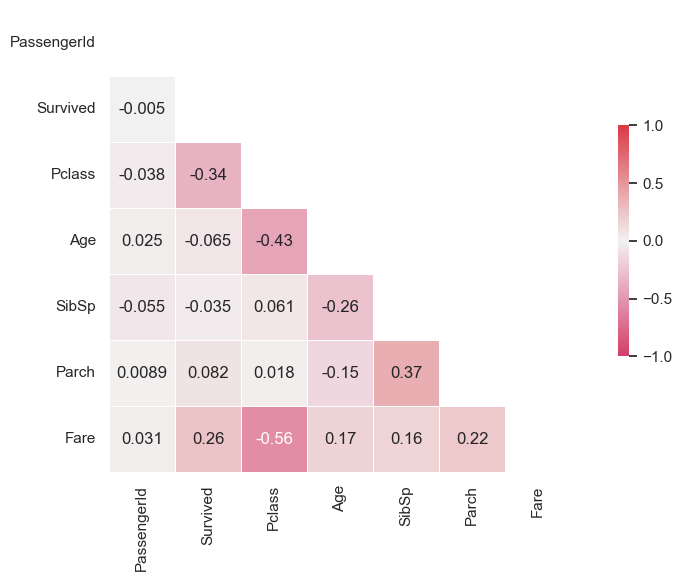

In [98]:
sns.set(style='white')                           

mask=np.triu(np.ones_like(corr_matrix, dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(corr_matrix,             
            mask=mascara,    
            cmap=cmap,
            vmax=1,
            vmin=-1,
            center=0,
            square=True,
            linewidth=0.5,
            
            cbar_kws={'shrink': 0.5},
            annot=True)
           

#### What are the most correlated features?

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

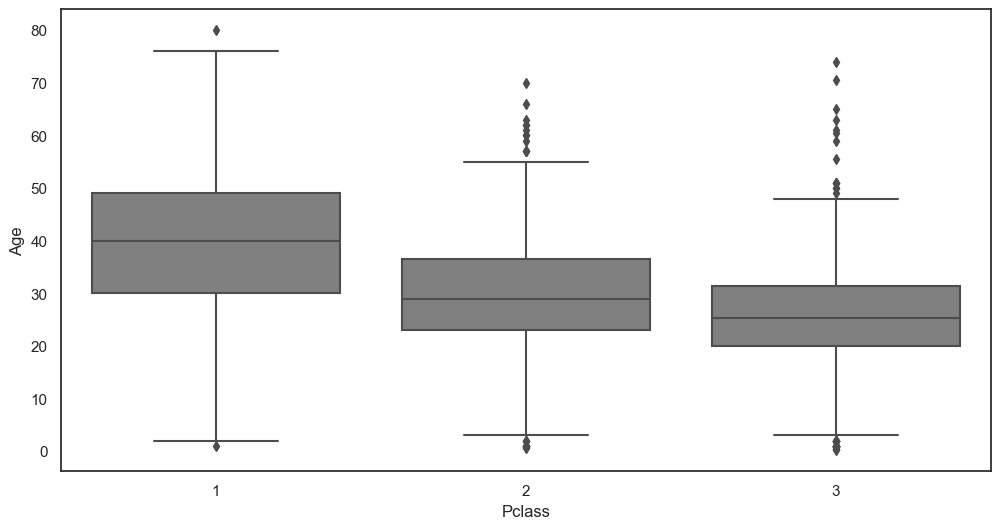

In [99]:
# your code here
sns.boxplot(x=titanic.Pclass, y=titanic.Age, color='grey');

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

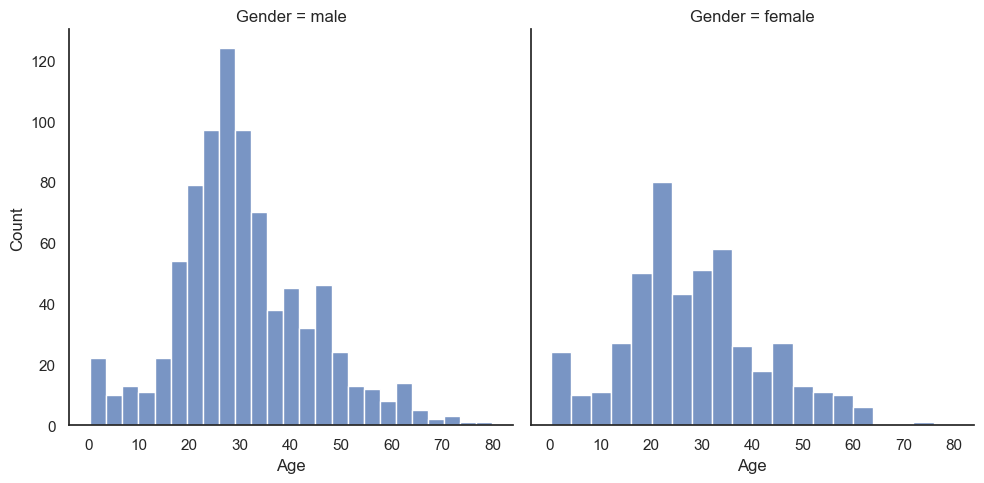

In [100]:
grafico = sns.FacetGrid(titanic, col='Gender', height=5)

grafico.map(sns.histplot, 'Age');